<a href="https://colab.research.google.com/github/BhanuSandeepVellalacheruvu/LUMINOSITY-SPECTRUM-COMPREHENSIVE-IMAGE-ENHANCEMENT-AND-ANALYSIS/blob/main/CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEHAZING WITH GUIDED FILTER**


1.   https://github.com/TummanapallyAnuraag/ImgDehazing/blob/master/code/grad_descent.py



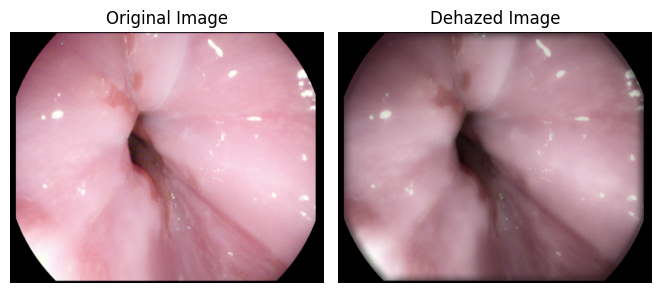

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig

def guide(I, P, r, e):
    # Your guide function implementation here
    h, w = np.shape(I)
    window = np.ones((r, r)) / (r * r)

    meanI = sig.convolve2d(I, window, mode='same')
    meanP = sig.convolve2d(P, window, mode='same')

    corrI = sig.convolve2d(I * I, window, mode='same')
    corrIP = sig.convolve2d(I * P, window, mode='same')

    varI = corrI - meanI * meanI
    covIP = corrIP - meanI * meanP
    a = covIP / (varI + e)
    b = meanP - a * meanI

    meana = sig.convolve2d(a, window, mode='same')
    meanb = sig.convolve2d(b, window, mode='same')

    q = meana * I + meanb

    return q

def localmin(D, r=15):
    # Your localmin function implementation here
    R = int(r/2)
    imax = D.shape[0]
    jmax = D.shape[1]
    LM = np.zeros([imax, jmax])
    for i in np.arange(D.shape[0]):
        for j in np.arange(D.shape[1]):
            iL = np.max([i-R, 0])
            iR = np.min([i+R, imax])
            jT = np.max([j-R, 0])
            jB = np.min([j+R, jmax])
            LM[i, j] = np.min(D[iL:iR+1, jT:jB+1])
    return LM

def postprocessing(GD, I):
    # Your postprocessing function implementation here
    flat_indices = np.argsort(GD, axis=None)
    R, C = GD.shape
    top_indices_flat = flat_indices[int(np.round(0.999 * R * C))::]
    top_indices = np.unravel_index(top_indices_flat, GD.shape)

    max_v_index = np.unravel_index(np.argmax(V[top_indices], axis=None), V.shape)
    I = I / 255.0
    A = I[max_v_index[0], max_v_index[1], :]

    beta = 1.0
    transmission = np.minimum(np.maximum(np.exp(-1 * beta * GD), 0.1), 0.9)
    transmission3 = np.zeros(I.shape)
    transmission3[:, :, 0] = transmission
    transmission3[:, :, 1] = transmission
    transmission3[:, :, 2] = transmission

    J = A + (I - A) / transmission3
    J = J - np.min(J)
    J = J / np.max(J)
    return J

def adjust_brightness(image, value):
    hsv = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v = np.clip(v.astype(np.int32) + value, 0, 255)
    final_v = np.clip(v, 0, 255).astype(np.uint8)
    final_hsv = cv2.merge((h, s, final_v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)


# Single image path
input_image_path = '/content/sample_data/33.jpg'

# Read the original image
original_image = plt.imread(input_image_path)

# Display the original image

# Process the single image
_I = cv2.imread(input_image_path)
I = cv2.cvtColor(_I, cv2.COLOR_BGR2RGB)
H, S, V = cv2.split(cv2.cvtColor(_I, cv2.COLOR_BGR2HSV))
V = V / 255.0
S = S / 255.0

# Calculate Depth Map using the linear model fit
theta_0 = 0.121779
theta_1 = 0.959710
theta_2 = -0.780245
sigma = 0.041337
epsilon = np.random.normal(0, sigma, H.shape)
D = theta_0 + theta_1 * V + theta_2 * S + epsilon

# Local Minima of Depth map
LMD = localmin(D, 15)

# Guided Filtering
r = 32 # try r=2, 4, or 8
eps = 0.2 * 0.2  # try eps=0.1^2, 0.2^2, 0.4^2
GD = guide(D, LMD, r, eps)

# Postprocessing
J = postprocessing(GD, I)

# Display the enhanced image with different brightness levels
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Display the enhanced image
plt.subplot(1, 3, 2)
plt.imshow(J)
plt.title('Dehazed Image')
plt.axis('off')

# Adjust brightness manually
brightness_increase = 100  # Change this value to adjust brightness (can be positive or negative)
J_adjusted_brightness = adjust_brightness(J, brightness_increase)



plt.tight_layout()
plt.show()


# **OPEN CV BASIC FUNCTION**

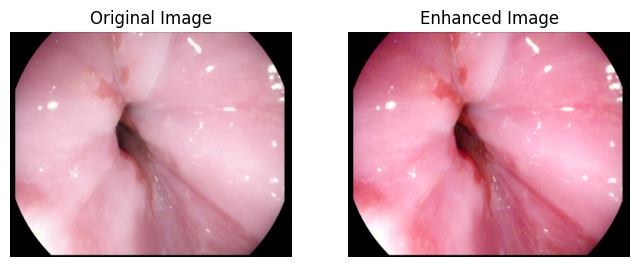

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/sample_data/33.jpg'
original_image = cv2.imread(image_path)

# Check if the image is loaded successfully
if original_image is None:
    print("Error: Unable to load image.")
else:
    # Increase saturation, brightness, and contrast
    saturation_factor = 1.55  # You can adjust this factor as needed
    brightness_factor = 0.7  # Adjust as needed
    contrast_factor = 1.5  # Adjust as needed

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Modify saturation, brightness, and contrast
    hsv_image[..., 1] = np.clip(hsv_image[..., 1] * saturation_factor, 0, 255)
    hsv_image[..., 2] = np.clip(hsv_image[..., 2] * brightness_factor, 0, 255)

    # Convert the modified HSV image back to BGR color space
    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    # Increase contrast
    alpha = contrast_factor  # Adjust as needed
    beta = 0  # No brightness adjustment
    enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=alpha, beta=beta)

    # Display the original and enhanced images using Matplotlib
    plt.figure(figsize=(8, 4))
    plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image'), plt.axis('off')
    plt.show()


# **MULTI SCARE RETINEX**

1.  https://github.com/dawnlh/awesome-low-light-image-enhancement/blob/master/codes/multiscaleRetinex.m



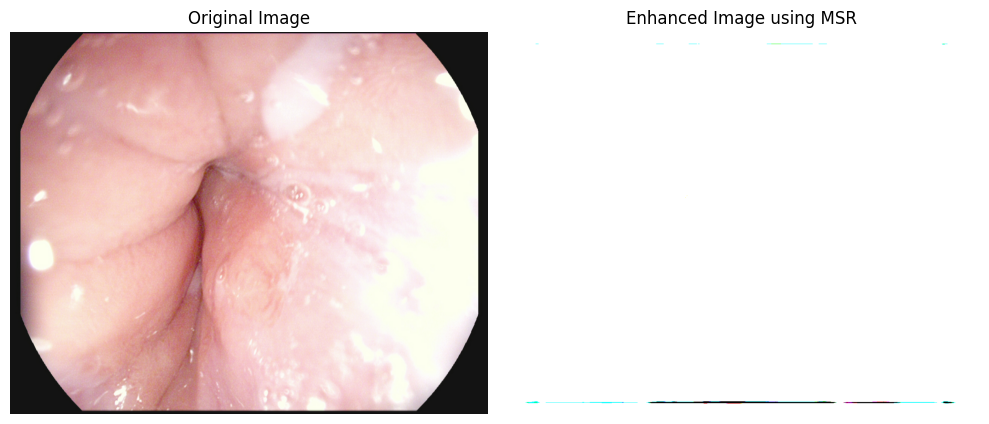

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import cv2

def SSR(I, *args):
    if len(args) == 3:
        sigma_x, sigma_y, sigma_channel = args
        T = np.zeros_like(I)
        for c in range(3):
            T[:, :, c] = gaussian_filter(I[:, :, c], (sigma_x, sigma_y), sigma_channel)
        return np.divide(I, T, out=np.zeros_like(I), where=T != 0)
    else:
        raise ValueError("SSR function expects three arguments for sigma values: sigma_x, sigma_y, sigma_channel")

def MSR(I, *args):
    if len(args) == 0:
        args = (25, 100, 240)
    OUT = 0
    N = len(args)
    for n in range(N):
        OUT += (1/N) * multiscaleRetinex(I, 'SSR', *args[n])
    return OUT

def MSRCR(I, lowScale=15, medScale=80, highScale=250, leftChop=1, rightChop=1):
    MSR_out = multiscaleRetinex(I, 'MSR', lowScale, medScale, highScale)
    OUT = np.zeros_like(I)
    for c in range(3):
        CR = np.log(125 * I[:,:,c]) - np.log(np.sum(I, axis=2))
        OUT[:,:,c] = CR * MSR_out[:,:,c]
    return np.clip(OUT, 0, 1)

def multiscaleRetinex(I, method, *args):
    if len(args) == 0:
        method = 'MSRCR'
    I = cv2.normalize(I.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX) * 255 + 1
    SSR_func = SSR if method in ['SSR', 'single scale retinex'] else None
    MSR_func = MSR if method in ['MSR', 'multi scale retinex'] else None
    MSRCR_func = MSRCR if method == 'MSRCR' else None

    if MSR_func:
        return MSR_func(I, args)
    elif MSRCR_func:
        return MSRCR_func(I, *args)
    elif SSR_func:
        return SSR_func(I, *args)
    else:
        return None

# Image path
image_path = '/content/sample_data/23.jpg'

# Load the image
original_image = cv2.imread(image_path)

# Check if the image is loaded successfully
if original_image is None:
    print("Error: Unable to load image.")
else:
    # Process the image using multiscaleRetinex function
    result = multiscaleRetinex(original_image, 'MSRCR', 15, 80, 250, 1, 1)

    # Display the original and processed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result.astype('float32'), cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image using MSR')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# **DYNAMIC HISTOGRAM EQUALISATION**

1.   https://github.com/AndyHuang1995/Image-Contrast-Enhancement/blob/master/dhe.py






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import imageio
import scipy, scipy.misc, scipy.signal
import cv2
import sys

def build_is_hist(img):
    hei = img.shape[0]
    wid = img.shape[1]
    ch = img.shape[2]
    Img = np.zeros((hei+4, wid+4, ch))
    for i in range(ch):
        Img[:,:,i] = np.pad(img[:,:,i], (2,2), 'edge')
    hsv = (matplotlib.colors.rgb_to_hsv(Img))
    hsv[:,:,0] = hsv[:,:,0] * 255
    hsv[:,:,1] = hsv[:,:,1] * 255
    hsv[hsv>255] = 255
    hsv[hsv<0] = 0
    hsv = hsv.astype(np.uint8).astype(np.float64)
    fh = np.array([[-1.0,0.0,1.0],[-2.0,0.0,2.0],[-1.0,0.0,1.0]])
    fv = fh.conj().T

    H = hsv[:,:,0]
    S = hsv[:,:,1]
    I = hsv[:,:,2]

    dIh = scipy.signal.convolve2d(I, np.rot90(fh, 2), mode='same')
    dIv = scipy.signal.convolve2d(I, np.rot90(fv, 2), mode='same')
    dIh[dIh==0] = 0.00001
    dIv[dIv==0] = 0.00001
    dI = np.sqrt(dIh**2+dIv**2).astype(np.uint32)
    di = dI[2:hei+2,2:wid+2]

    dSh = scipy.signal.convolve2d(S, np.rot90(fh, 2), mode='same')
    dSv = scipy.signal.convolve2d(S, np.rot90(fv, 2), mode='same')
    dSh[dSh==0] = 0.00001
    dSv[dSv==0] = 0.00001
    dS = np.sqrt(dSh**2+dSv**2).astype(np.uint32)
    ds = dS[2:hei+2,2:wid+2]

    h = H[2:hei+2,2:wid+2]
    s = S[2:hei+2,2:wid+2]
    i = I[2:hei+2,2:wid+2].astype(np.uint8)

    Imean = scipy.signal.convolve2d(I,np.ones((5,5))/25, mode='same')
    Smean = scipy.signal.convolve2d(S,np.ones((5,5))/25, mode='same')

    Rho = np.zeros((hei+4,wid+4))
    for p in range(2,hei+2):
        for q in range(2,wid+2):
            tmpi = I[p-2:p+3,q-2:q+3]
            tmps = S[p-2:p+3,q-2:q+3]
            corre = np.corrcoef(tmpi.flatten('F'),tmps.flatten('F'))
            Rho[p,q] = corre[0,1]

    rho = np.abs(Rho[2:hei+2,2:wid+2])
    rho[np.isnan(rho)] = 0
    rd = (rho*ds).astype(np.uint32)
    Hist_I = np.zeros((256,1))
    Hist_S = np.zeros((256,1))

    for n in range(0,255):
        temp = np.zeros(di.shape)
        temp[i==n] = di[i==n]
        Hist_I[n+1] = np.sum(temp.flatten('F'))
        temp = np.zeros(di.shape)
        temp[i==n] = rd[i==n]
        Hist_S[n+1] = np.sum(temp.flatten('F'))

    hist_i, hist_s = Hist_I, Hist_S
    hist_c = 0.5*hist_s + 0.5*hist_i
    hist_sum = np.sum(hist_c)
    hist_cum = hist_c.cumsum(axis=0)

    hsv = matplotlib.colors.rgb_to_hsv(img)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    i = hsv[:,:,2].astype(np.uint8)

    c = hist_cum / hist_sum
    s_r = (c * 255)
    i_s = np.zeros(i.shape)
    for n in range(0,255):
        i_s[i==n] = s_r[n+1]/255.0
    i_s[i==255] = 1
    hsi_o = np.stack((h,s,i_s), axis=2)
    result = matplotlib.colors.hsv_to_rgb(hsi_o)

    result = result * 255
    result[result>255] = 255
    result[result<0] = 0
    return result.astype(np.uint8)

def main():
    img_name = '/content/sample_data/img/1.jpg'
    img = imageio.imread(img_name)
    result = build_is_hist(img)
    plt.imshow(result)
    plt.show()

if __name__ == '__main__':
    main()


<ipython-input-9-0b4957d5d14d>:98: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_name)


FileNotFoundError: ignored

# **HISTOGRAM EQUALISATION**

1.   https://github.com/AndyHuang1995/Image-Contrast-Enhancement/blob/master/he.py



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure as ex
import imageio
import sys

def he(img):
    if(len(img.shape)==2):      #gray
        outImg = ex.equalize_hist(img[:,:])*255
    elif(len(img.shape)==3):    #RGB
        outImg = np.zeros((img.shape[0],img.shape[1],3))
        for channel in range(img.shape[2]):
            outImg[:, :, channel] = ex.equalize_hist(img[:, :, channel])*255

    outImg[outImg>255] = 255
    outImg[outImg<0] = 0
    return outImg.astype(np.uint8)

def main():
    img_name = sys.argv[1]
    img = imageio.imread('/content/sample_data/23.jpg')
    result = he(img)
    plt.imshow(result)
    plt.title('Enhanced Image using Histogram Equalisation')
    plt.show()

if __name__ == '__main__':
    main()

<ipython-input-3-4f3bc91cf4c7>:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/sample_data/23.jpg')


# **SINGLE SCALE RETINEX**

<ipython-input-4-56b4091573b2>:15: RuntimeWarning: divide by zero encountered in log10
  return np.log10(img) - np.log10(get_gaussian_blur(img, ksize=0, sigma=sigma) + 1.0)


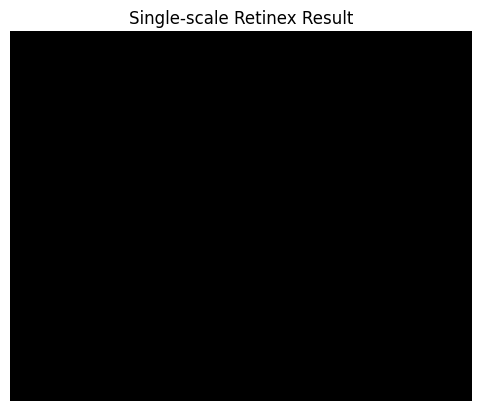

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_ksize(sigma):
    return int(((sigma - 0.8) / 0.15) + 2.0)

def get_gaussian_blur(img, ksize=0, sigma=5):
    if ksize == 0:
        ksize = get_ksize(sigma)
    sep_k = cv2.getGaussianKernel(ksize, sigma)
    return cv2.filter2D(img, -1, np.outer(sep_k, sep_k))

def ssr(img, sigma):
    return np.log10(img) - np.log10(get_gaussian_blur(img, ksize=0, sigma=sigma) + 1.0)

# Provide the image path
image_path = '/content/sample_data/1.jpg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply single-scale retinex with sigma value
sigma_value = 5  # Adjust sigma value as needed
result = ssr(gray_img.astype(np.float64), sigma_value)

# Normalize the result to display as an image
result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX)
result = np.uint8(result)

# Display the result using Matplotlib
plt.imshow(result)
plt.title('Single-scale Retinex Result')
plt.axis('off')
plt.show()




# **MSR**



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def msr(img, sigma_scales=[15, 80, 250]):
    msr = np.zeros(img.shape)
    for sigma in sigma_scales:
        ksize = get_ksize(sigma)
        gaussian_img = get_gaussian_blur(img, ksize, sigma)
        msr += np.log10(img) - np.log10(gaussian_img + 1.0)
    msr /= len(sigma_scales)
    msr = cv2.normalize(msr, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)
    return msr

# Provide the image path
image_path = '/content/sample_data/1.jpg'

# Read the image using OpenCV
img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)


# Check if the image is read successfully
if img is None:
    print(f"Error: Unable to read the image from {image_path}")
else:
    # Apply multi-scale retinex
    result = msr(img)

    # Display the original and output side by side using Matplotlib
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Multi-scale Retinex Result
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title('Multi-scale Retinex Result')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


<ipython-input-15-d66b3377cf96>:11: RuntimeWarning: divide by zero encountered in log10
  msr += np.log10(img) - np.log10(gaussian_img + 1.0)


# **MSR WITH COLOR RESTORATION**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Your previous functions here
def get_ksize(sigma):
    return int(((sigma - 0.8) / 0.15) + 2.0)

def get_gaussian_blur(img, ksize=0, sigma=5):
    if ksize == 0:
        ksize = get_ksize(sigma)
    sep_k = cv2.getGaussianKernel(ksize, sigma)
    return cv2.filter2D(img, -1, np.outer(sep_k, sep_k))

def ssr(img, sigma):
    return np.log10(img) - np.log10(get_gaussian_blur(img, ksize=0, sigma=sigma) + 1.0)

def msr(img, sigma_scales=[15, 80, 250]):
    msr = np.zeros(img.shape)
    for sigma in sigma_scales:
        msr += ssr(img, sigma)
    msr = msr / len(sigma_scales)
    msr = cv2.normalize(msr, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)
    return msr

def color_balance(img, low_per, high_per):
    tot_pix = img.shape[1] * img.shape[0]
    # no.of pixels to black-out and white-out
    low_count = tot_pix * low_per / 100
    high_count = tot_pix * (100 - high_per) / 100

    # channels of image
    ch_list = []
    if len(img.shape) == 2:
        ch_list = [img]
    else:
        ch_list = cv2.split(img)

    cs_img = []
    # for each channel, apply contrast-stretch
    for i in range(len(ch_list)):
        ch = ch_list[i]
        # cummulative histogram sum of channel
        cum_hist_sum = np.cumsum(cv2.calcHist([ch], [0], None, [256], (0, 256)))

        # find indices for blacking and whiting out pixels
        li, hi = np.searchsorted(cum_hist_sum, (low_count, high_count))
        if (li == hi):
            cs_img.append(ch)
            continue
        # lut with min-max normalization for [0-255] bins
        lut = np.array([0 if i < li
                        else (255 if i > hi else round((i - li) / (hi - li) * 255))
                        for i in np.arange(0, 256)], dtype = 'uint8')
        # constrast-stretch channel
        cs_ch = cv2.LUT(ch, lut)
        cs_img.append(cs_ch)

    if len(cs_img) == 1:
        return np.squeeze(cs_img)
    elif len(cs_img) > 1:
        return cv2.merge(cs_img)
    return None


def msrcr(img, sigma_scales=[15, 80, 250], alpha=125, beta=46, G=192, b=-30, low_per=1, high_per=1):
    img = img.astype(np.float64) + 1.0
    # Multi-scale retinex and don't normalize the output
    msr_img = msr(img, sigma_scales)
    # Color-restoration function
    crf = beta * (np.log10(alpha * img) - np.log10(np.sum(img, axis=2, keepdims=True)))
    # MSRCR
    msrcr = G * (msr_img*crf - b)
    # normalize MSRCR
    msrcr = cv2.normalize(msrcr, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)
    # color balance the final MSRCR to flat the histogram distribution with tails on both sides
    msrcr = color_balance(msrcr, low_per, high_per)

    return msrcr

# Image path
image_path = '/content/sample_data/1.jpg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Apply MSRCR to the image
result = msrcr(img)

# Display the processed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('MSRCR Result')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Multi Scale Retinex with Color Preservation**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Your previous functions here
def get_ksize(sigma):
    return int(((sigma - 0.4) / 0.15) + 2.0)

# Define ssr, msr, color_balance functions here...

def msrcp(img, sigma_scales=[15, 80, 250], low_per=1, high_per=1):
    int_img = (np.sum(img, axis=2) / img.shape[2]) + 1.0
    msr_int = msr(int_img, sigma_scales)
    msr_cb = color_balance(msr_int, low_per, high_per)
    B = 256.0 / (np.max(img, axis=2) + 1.0)
    BB = np.array([B, msr_cb/int_img])
    A = np.min(BB, axis=0)
    msrcp = np.clip(np.expand_dims(A, 2) * img, 0.0, 255.0)
    return msrcp.astype(np.uint8)

# Image path
image_path = '/content/sample_data/1.jpg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Apply MSRCR to the image
result = msrcp(img)

# Display the processed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('MSRCP Result')
plt.axis('off')

plt.tight_layout()
plt.show()


# **ANOTHER CAPSTONE**

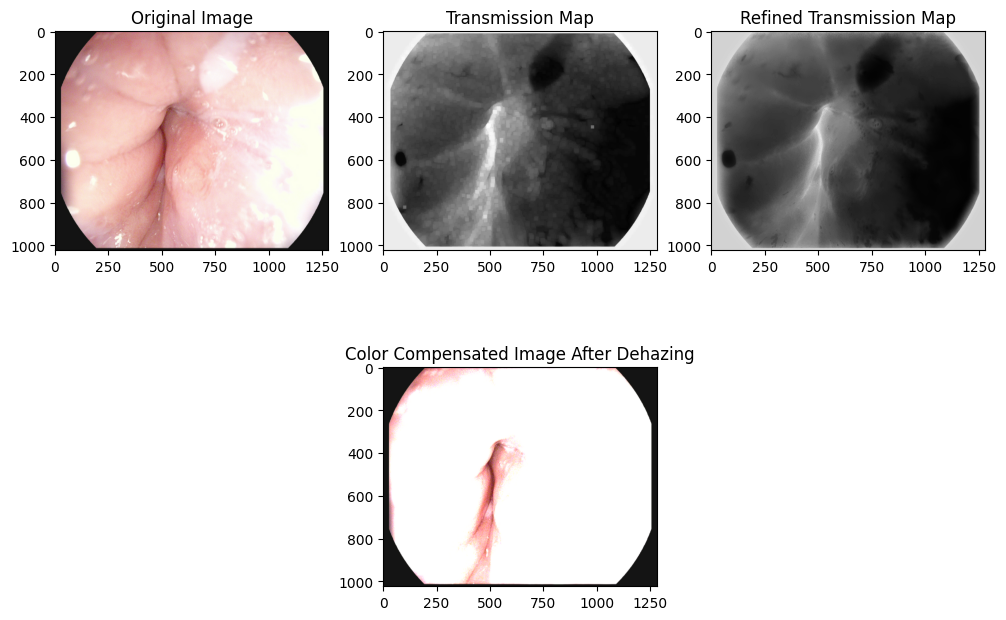

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Use matplotlib to display images
import cv2

def estimate_transmission(I):
    """Estimate the transmission map using the dark channel prior."""
    w = 15  # Window size for computing the minimum
    t0 = 0.1  # Threshold for removing artifacts

    J = I.astype('float') / 255.0
    J_dark = np.min(J, axis=2)
    J_dark_min = sliding_window_min(J_dark, w)
    t = 1 - (J_dark_min / 255.0)
    t[t < t0] = t0
    t = (t - np.min(t)) / (np.max(t) - np.min(t))
    return t

def estimate_atmospheric_light(I, t):
    J = I.astype('float') / 255.0
    J_dark = np.min(J, axis=2)
    J_flat = J_dark * (1 - t)
    ind = np.argmax(J_flat)
    ind_row, ind_col = np.unravel_index(ind, J_dark.shape)
    A = I[ind_row, ind_col, :]
    return A

def recover_haze_free_image(I, t, A):
    # Recover the haze-free image using the atmospheric light and refined transmission map
    J = np.zeros(I.shape)
    for i in range(3):
        t_double = t.astype(float) # Convert t to a double precision array
        A_double = float(A[i])/255 # Convert A to a double precision vector
        J[:,:,i] = (I[:,:,i].astype(float) - A_double) / t_double + A_double # Use double precision arrays for division
    return J


def sliding_window_min(I, window_size):
    min_val = np.zeros_like(I)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            min_val[i, j] = np.min(I[max(0, i-window_size//2):min(I.shape[0], i+window_size//2+1),
                                     max(0, j-window_size//2):min(I.shape[1], j+window_size//2+1)])
    return min_val

def grayedge(I):
    """Apply the Gray-Edge algorithm to enhance the contrast of an image."""
    I = I.astype('float32') / 255.0  # Convert to float32
    I_gray = np.mean(I, axis=2)
    I_gray_filtered = cv2.bilateralFilter(I_gray, 9, 75, 75)

    # Resize I_gray_filtered to match the dimensions of I
    I_gray_filtered_resized = cv2.resize(I_gray_filtered, (I.shape[1], I.shape[0]))

    # Duplicate the single channel along the third axis
    I_gray_filtered_resized = np.stack([I_gray_filtered_resized] * 3, axis=-1)

    I_edge = np.abs(I - I_gray_filtered_resized)
    I_edge = np.max(I_edge, axis=2)
    I_edge = I_edge / np.max(I_edge)

    # Add a new axis to I_edge for broadcasting
    I_edge = I_edge[:, :, np.newaxis]

    I_comp = I + I_edge
    return I_comp

def main():
    # Load the hazed underwater image
    I = plt.imread('/content/sample_data/23.jpg')  # Use plt.imread() to read the image

    # Estimate the transmission map
    t = estimate_transmission(I)

    # Refine the transmission map using guided filter
    t_refined = cv2.ximgproc.guidedFilter(I.astype('float32'), t.astype('float32'), 21, 50)

    # Estimate the global atmospheric light
    A = estimate_atmospheric_light(I, 0.2*t_refined)

    # Recover the haze-free image
    J = recover_haze_free_image(I, t_refined,0.6*A)

    # Show the results using plt.imshow()
    plt.figure(figsize=(12, 8))

    plt.subplot(231)
    plt.imshow(I)
    plt.title('Original Image')

    plt.subplot(232)
    plt.imshow(t, cmap='gray')
    plt.title('Transmission Map')

    plt.subplot(233)
    plt.imshow(t_refined, cmap='gray')
    plt.title('Refined Transmission Map')

    plt.subplot(235)
    plt.imshow(grayedge(J))
    plt.title('Color Compensated Image After Dehazing')

if __name__ == '__main__':
    main()


In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install scipy
!pip install numpy
!pip install jupyterlab


# **Dehazing for the capstone**

Atmosphere A = (r, g, b)
[0. 0. 0.]


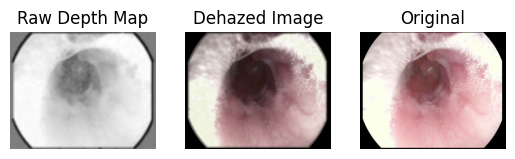

In [ ]:
# Import all the necessary packages to your arsenal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig

def guide(I, P, r, e):
    h, w = np.shape(I)
    window = np.ones((r, r)) / (r * r)

    meanI = sig.convolve2d(I, window, mode='same')
    meanP = sig.convolve2d(P, window, mode='same')

    corrI = sig.convolve2d(I * I, window, mode='same')
    corrIP = sig.convolve2d(I * P, window, mode='same')

    varI = corrI - meanI * meanI
    covIP = corrIP - meanI * meanP
    a = covIP / (varI + e)
    b = meanP - a * meanI

    meana = sig.convolve2d(a, window, mode='same')
    meanb = sig.convolve2d(b, window, mode='same')

    q = meana * I + meanb

    return q

def localmin(D, r=15):
    R = int(r / 2)
    imax, jmax = D.shape
    LM = np.zeros([imax, jmax])
    for i in np.arange(D.shape[0]):
        for j in np.arange(D.shape[1]):
            iL = np.max([i - R, 0])
            iR = np.min([i + R, imax])
            jT = np.max([j - R, 0])
            jB = np.min([j + R, jmax])
            LM[i, j] = np.min(D[iL:iR + 1, jT:jB + 1])
    return LM

def postprocessing(GD, I):
    # this will give indices of the columnized image GD
    flat_indices = np.argsort(GD, axis=None)
    R, C = GD.shape
    top_indices_flat = flat_indices[int(np.round(0.999 * R * C))::]
    top_indices = np.unravel_index(top_indices_flat, GD.shape)

    max_v_index = np.unravel_index(np.argmax(V[top_indices], axis=None), V.shape)
    I = I / 255.0
    A = I[max_v_index[0], max_v_index[1], :]
    print('Atmosphere A = (r, g, b)')
    print(A)

    beta = 1.0
    transmission = np.minimum(np.maximum(np.exp(-1 * beta * GD), 0.1), 0.9)
    transmission3 = np.zeros(I.shape)
    transmission3[:, :, 0] = transmission
    transmission3[:, :, 1] = transmission
    transmission3[:, :, 2] = transmission

    J = A + (I - A) / transmission3
    J = J - np.min(J)
    J = J / np.max(J)
    return J

# Read the Image
_I = cv2.imread('/content/sample_data/11.jpg')
# opencv reads any image in Blue-Green-Red(BGR) format,
# so change it to RGB format, which is popular.
I = cv2.cvtColor(_I, cv2.COLOR_BGR2RGB)
# Split Image to Hue-Saturation-Value(HSV) format.
H, S, V = cv2.split(cv2.cvtColor(_I, cv2.COLOR_BGR2HSV))
V = V / 255.0
S = S / 255.0

# Calculating Depth Map using the linear model fit by ZHU et al.
# Refer Eq(8) in mentioned research paper (README.md file) page 3535.
theta_0 = 0.121779
theta_1 = 0.959710
theta_2 = -0.780245
sigma = 0.041337
epsilon = np.random.normal(0, sigma, H.shape)
D = theta_0 + theta_1 * V + theta_2 * S + epsilon

# Local Minima of Depth map
LMD = localmin(D, 15)

# Guided Filtering
r = 16  # try r=2, 4, or 8
eps = 0.01  # try eps=0.1^2, 0.2^2, 0.4^2
GD = guide(D, LMD, r, eps)

J = postprocessing(GD, I)

# Plot the generated raw depth map
plt.subplot(1, 3, 1)
plt.imshow(GD, cmap='gray')
plt.title('Raw Depth Map')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(J)
plt.title('Dehazed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(I)
plt.title('Original')
plt.axis('off')

plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Your previous functions here
def get_ksize(sigma):
    return int(((sigma - 0.4) / 0.15) + 2.0)


def msrcp(img, sigma_scales=[1000, 705, 800], low_per=1, high_per=5):
    int_img = (np.sum(img, axis=2) / img.shape[2]) + 25.0
    msr_int = msr(int_img, sigma_scales)
    msr_cb = color_balance(msr_int, low_per, high_per)
    B = 256.0 / (np.max(img, axis=2) + 3.0)
    BB = np.array([B, msr_cb/int_img])
    A = np.min(BB, axis=0)
    msrcp = np.clip(np.expand_dims(A, 2) * img, 0.0, 255.0)
    return msrcp.astype(np.uint8)

# Image path
image_path = '/content/sample_data/33.jpg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Apply MSRCR to the image
result = msrcp(img)

def enhance_image(original_image, saturation_factor=1.4, brightness_factor=0.5, contrast_factor=1,sharpening_factor=1):
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
    hsv_image[..., 1] = np.clip(hsv_image[..., 1] * saturation_factor, 0, 255)
    hsv_image[..., 2] = np.clip(hsv_image[..., 2] * brightness_factor, 0, 255)
    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    alpha = contrast_factor
    beta = 0
    enhanced_image = cv2.convertScaleAbs(enhanced_image, alpha=alpha, beta=beta)
    kernel = np.array([[-1, -1, -1],
                       [-1, 9 + sharpening_factor, -1],
                       [-1, -1, -1]])
    enhanced_image = cv2.filter2D(enhanced_image, -1, kernel)
    return enhanced_image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhance_image(result), cv2.COLOR_BGR2RGB))  # Corrected: Call enhance_image with 'result'
plt.title('MSRCP Result')
plt.axis('off')

plt.tight_layout()
plt.show()
